In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


**Step 1: Select a real-world dataset**

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")  # Load the dataset
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.head()  # Show first 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Step 2: Perform data preparation & cleaning**

In [5]:
df.shape  # Shape of dataset (rows, cols)

(891, 12)

In [6]:
df.info()  # Info about datatypes & missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()  # Missing values count

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df['Age'].fillna(df['Age'].median(), inplace=True)  # Fill missing 'Age' with median

/tmp/ipykernel_12/2158953264.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)  # Fill missing 'Age' with median


In [9]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Fill missing 'Embarked' with mode

/tmp/ipykernel_12/1779397812.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Fill missing 'Embarked' with mode


In [10]:
df.drop(columns=['Cabin'], inplace=True)  # Drop 'Cabin' (too many missing values)

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Step 3: Perform exploratory analysis & visualization Matplotlib - Resources**

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

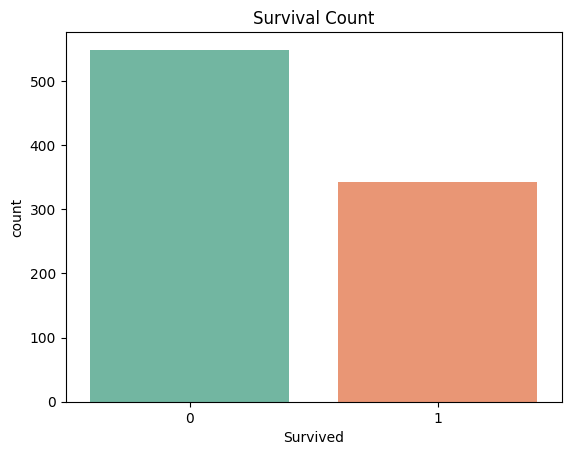

In [13]:
sns.countplot(x="Survived", data=df, palette="Set2")  # Survival count
plt.title("Survival Count")
plt.show()

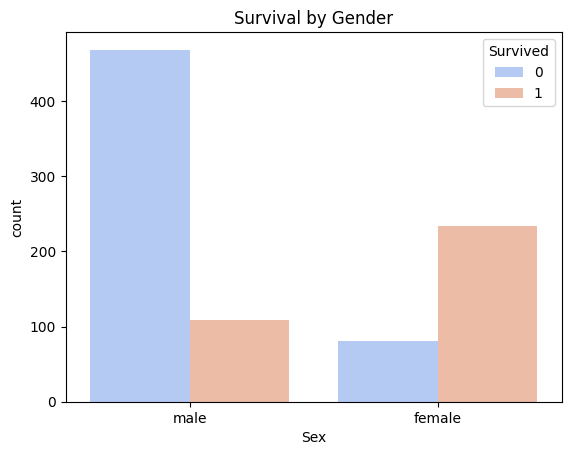

In [14]:
sns.countplot(x="Sex", hue="Survived", data=df, palette="coolwarm")  # Gender vs Survival
plt.title("Survival by Gender")
plt.show()

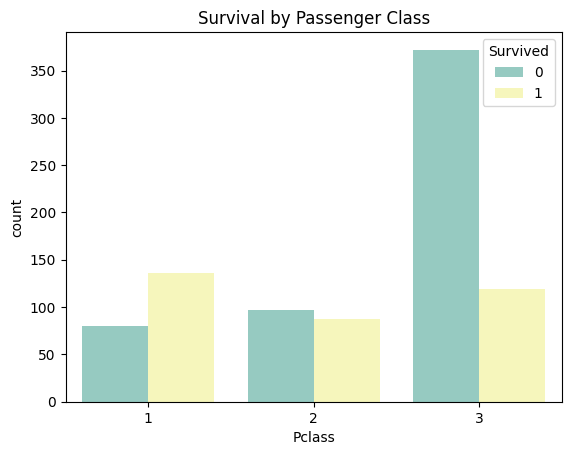

In [15]:
sns.countplot(x="Pclass", hue="Survived", data=df, palette="Set3")  # Class vs Survival
plt.title("Survival by Passenger Class")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


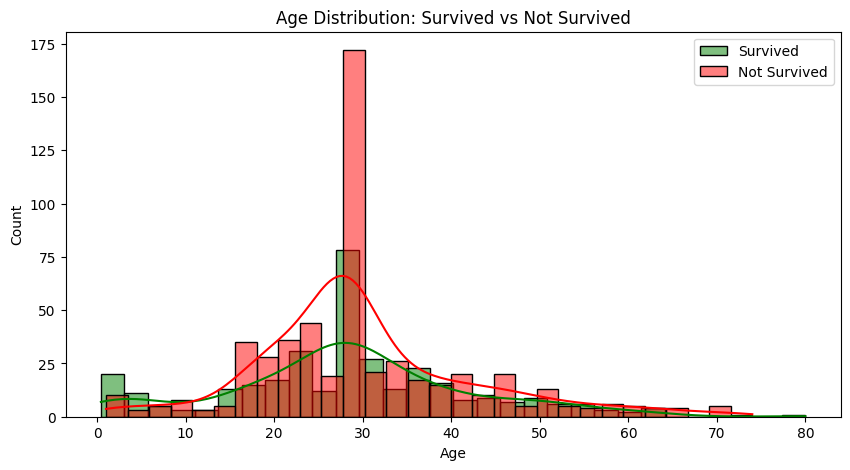

In [16]:
plt.figure(figsize=(10,5))  # Age distribution of survivors vs non-survivors
sns.histplot(df[df['Survived']==1]['Age'], bins=30, color="green", label="Survived", kde=True)
sns.histplot(df[df['Survived']==0]['Age'], bins=30, color="red", label="Not Survived", kde=True)
plt.legend()
plt.title("Age Distribution: Survived vs Not Survived")
plt.show()

**Step 4: Ask & answer questions about the data**

**Q1. What percentage of passengers survived?**

In [17]:
survival_rate = df['Survived'].mean() * 100
print(f"Survival Rate: {survival_rate:.2f}%")

Survival Rate: 38.38%


**Q2. Did gender affect survival rate?**

In [18]:
df.groupby("Sex")["Survived"].mean()*100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

**Q3. Which passenger class had the highest survival rate?**

In [19]:
df.groupby("Pclass")["Survived"].mean()*100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

**Q4. Did age influence survival?**

In [20]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,12,18,40,60,80], labels=["Child","Teen","Adult","Middle-aged","Senior"])
df.groupby("AgeGroup")["Survived"].mean()*100

/tmp/ipykernel_12/2069680690.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("AgeGroup")["Survived"].mean()*100


AgeGroup
Child          57.971014
Teen           42.857143
Adult          36.046512
Middle-aged    39.062500
Senior         22.727273
Name: Survived, dtype: float64

**Step 5: Summarize your inferences & write a conclusion**


Survival rates decreased significantly for passengers in 3rd class, showing a strong link between socio-economic status and survival.Male passengers in 3rd class had the lowest chance of survival overall.Elderly passengers had lower survival rates compared to younger groups.Passengers traveling alone had lower survival chances than those traveling with family.Embarkation port influenced outcomes slightly, with passengers boarding from Cherbourg having comparatively higher survival.Survival was strongly associated with women and children first policy, reflecting the evacuation protocol.Passengers with smaller families had better chances than those with very large families.
